In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [2]:
''' ラグ01（販売個数トレンド+ASP+Revenue58特徴量'''
#lag01 = pd.read_csv('./csv/target_lag01.csv')
'''Outlier最終データ'''
outlier_data = pd.read_csv('./csv/total_outlier_w_170_matrix_final.csv')
# sub data = matrix.iloc[181438:,:]
'''最終データ'''
data = pd.read_csv('./csv/matrix_final.csv')

In [3]:
data = data[[
    'date_block_num',
    'YYYY', 
    'MM', 
    'StoreId',
    'ItemId', 
    'SoldNum',
    'is_holiday',
    'ItemCategoryId',
    'Category', 
    'Type',
    'SoldNum_lag_1',
    'SoldNum_lag_2',
    'SoldNum_lag_3',
    'SoldNum_lag_6',
    'SoldNum_lag_12',
    'date_avg_item_cnt_lag_1',#
    'date_avg_item_cnt_lag_2', #
    'date_avg_item_cnt_lag_3',#
    'date_avg_item_cnt_lag_6', #
    'date_avg_item_cnt_lag_12',#
    'date_shop_avg_item_cnt_lag_1',#
    'date_shop_avg_item_cnt_lag_2',
    'date_shop_avg_item_cnt_lag_3',
    'date_shop_avg_item_cnt_lag_6',
    'date_shop_avg_item_cnt_lag_12', 
    'date_itemcat_avg_item_cnt_lag_1',
    'date_itemcat_avg_item_cnt_lag_2',#
    'date_itemcat_avg_item_cnt_lag_3',#
    'date_itemcat_avg_item_cnt_lag_6',
    'date_itemcat_avg_item_cnt_lag_12', 
    'date_cat_avg_item_cnt_lag_1',#
    'date_cat_avg_item_cnt_lag_2',#
    'date_cat_avg_item_cnt_lag_3',#
    'date_cat_avg_item_cnt_lag_6', #
    'date_cat_avg_item_cnt_lag_12',#
    'date_type_avg_item_cnt_lag_1',
    'date_type_avg_item_cnt_lag_2',
    'date_type_avg_item_cnt_lag_3', 
    'date_type_avg_item_cnt_lag_6',#
    'date_type_avg_item_cnt_lag_12',#
    'date_shop_itemcat_avg_item_cnt_lag_1',
    'date_shop_itemcat_avg_item_cnt_lag_2',#
    'date_shop_itemcat_avg_item_cnt_lag_3',#
    'date_shop_itemcat_avg_item_cnt_lag_6',
    'date_shop_itemcat_avg_item_cnt_lag_12',#
    'date_shop_cat_avg_item_cnt_lag_1',
    'date_shop_cat_avg_item_cnt_lag_2',#
    'date_shop_cat_avg_item_cnt_lag_3',#
    'date_shop_cat_avg_item_cnt_lag_6',#
    'date_shop_cat_avg_item_cnt_lag_12',#
    'date_shop_type_avg_item_cnt_lag_1',
    'date_shop_type_avg_item_cnt_lag_2',#
    'date_shop_type_avg_item_cnt_lag_3',#
    'date_shop_type_avg_item_cnt_lag_6',
    'date_shop_type_avg_item_cnt_lag_12', #
    'Revenue', 
    'delta_price_lag',#
    'delta_revenue_lag_1', #
    'item_shop_last_sale', #
    'item_last_sale',#
    'item_shop_first_sale', #
    'item_first_sale'#
]]

In [4]:
data_from_outlier = outlier_data[[
    #'date_block_num',
    #'YYYY', 
    #'MM', 
    #'StoreId',
    #'ItemId', 
    #'SoldNum',
    #'is_holiday',
    #'ItemCategoryId',
    #'Category', 
    #'Type',
    #'SoldNum_lag_1',
    #'SoldNum_lag_2',
    #'SoldNum_lag_3',
    #'SoldNum_lag_6',
    #'SoldNum_lag_12',
    'date_avg_item_cnt_lag_1',#
    'date_avg_item_cnt_lag_2', #
    'date_avg_item_cnt_lag_3',#
    'date_avg_item_cnt_lag_6', #
    'date_avg_item_cnt_lag_12',#
    'date_shop_avg_item_cnt_lag_1',#
    'date_shop_avg_item_cnt_lag_2',
    'date_shop_avg_item_cnt_lag_3',
    'date_shop_avg_item_cnt_lag_6',
    'date_shop_avg_item_cnt_lag_12', 
    'date_itemcat_avg_item_cnt_lag_1',
    'date_itemcat_avg_item_cnt_lag_2',#
    'date_itemcat_avg_item_cnt_lag_3',#
    'date_itemcat_avg_item_cnt_lag_6',
    'date_itemcat_avg_item_cnt_lag_12', 
    'date_cat_avg_item_cnt_lag_1',#
    'date_cat_avg_item_cnt_lag_2',#
    'date_cat_avg_item_cnt_lag_3',#
    'date_cat_avg_item_cnt_lag_6', #
    'date_cat_avg_item_cnt_lag_12',#
    'date_type_avg_item_cnt_lag_1',
    'date_type_avg_item_cnt_lag_2',
    'date_type_avg_item_cnt_lag_3', 
    'date_type_avg_item_cnt_lag_6',#
    'date_type_avg_item_cnt_lag_12',#
    'date_shop_itemcat_avg_item_cnt_lag_1',
    'date_shop_itemcat_avg_item_cnt_lag_2',#
    'date_shop_itemcat_avg_item_cnt_lag_3',#
    'date_shop_itemcat_avg_item_cnt_lag_6',
    'date_shop_itemcat_avg_item_cnt_lag_12',#
    'date_shop_cat_avg_item_cnt_lag_1',
    'date_shop_cat_avg_item_cnt_lag_2',#
    'date_shop_cat_avg_item_cnt_lag_3',#
    'date_shop_cat_avg_item_cnt_lag_6',#
    'date_shop_cat_avg_item_cnt_lag_12',#
    'date_shop_type_avg_item_cnt_lag_1',
    'date_shop_type_avg_item_cnt_lag_2',#
    'date_shop_type_avg_item_cnt_lag_3',#
    'date_shop_type_avg_item_cnt_lag_6',
    'date_shop_type_avg_item_cnt_lag_12', #
    #'Revenue', 
    #'delta_price_lag',#
    #'delta_revenue_lag_1', #
    #'item_shop_last_sale', #
    #'item_last_sale',#
    #'item_shop_first_sale', #
    #'item_first_sale'#
]]

In [5]:
data_from_outlier.columns = [
    #'date_block_num',
    #'YYYY', 
    #'MM', 
    #'StoreId',
    #'ItemId', 
    #'SoldNum',
    #'is_holiday',
    #'ItemCategoryId',
    #'Category', 
    #'Type',
    #'SoldNum_lag_1',
    #'SoldNum_lag_2',
    #'SoldNum_lag_3',
    #'SoldNum_lag_6',
    #'SoldNum_lag_12',
    'date_avg_item_cnt_lag_1t',#
    'date_avg_item_cnt_lag_2t', #
    'date_avg_item_cnt_lag_3t',#
    'date_avg_item_cnt_lag_6t', #
    'date_avg_item_cnt_lag_12t',#
    'date_shop_avg_item_cnt_lag_1t',#
    'date_shop_avg_item_cnt_lag_2t',
    'date_shop_avg_item_cnt_lag_3t',
    'date_shop_avg_item_cnt_lag_6t',
    'date_shop_avg_item_cnt_lag_12t', 
    'date_itemcat_avg_item_cnt_lag_1t',
    'date_itemcat_avg_item_cnt_lag_2t',#
    'date_itemcat_avg_item_cnt_lag_3t',#
    'date_itemcat_avg_item_cnt_lag_6t',
    'date_itemcat_avg_item_cnt_lag_12t', 
    'date_cat_avg_item_cnt_lag_1t',#
    'date_cat_avg_item_cnt_lag_2t',#
    'date_cat_avg_item_cnt_lag_3t',#
    'date_cat_avg_item_cnt_lag_6t', #
    'date_cat_avg_item_cnt_lag_12t',#
    'date_type_avg_item_cnt_lag_1t',
    'date_type_avg_item_cnt_lag_2t',
    'date_type_avg_item_cnt_lag_3t', 
    'date_type_avg_item_cnt_lag_6t',#
    'date_type_avg_item_cnt_lag_12t',#
    'date_shop_itemcat_avg_item_cnt_lag_1t',
    'date_shop_itemcat_avg_item_cnt_lag_2t',#
    'date_shop_itemcat_avg_item_cnt_lag_3t',#
    'date_shop_itemcat_avg_item_cnt_lag_6t',
    'date_shop_itemcat_avg_item_cnt_lag_12t',#
    'date_shop_cat_avg_item_cnt_lag_1t',
    'date_shop_cat_avg_item_cnt_lag_2t',#
    'date_shop_cat_avg_item_cnt_lag_3t',#
    'date_shop_cat_avg_item_cnt_lag_6t',#
    'date_shop_cat_avg_item_cnt_lag_12t',#
    'date_shop_type_avg_item_cnt_lag_1t',
    'date_shop_type_avg_item_cnt_lag_2t',#
    'date_shop_type_avg_item_cnt_lag_3t',#
    'date_shop_type_avg_item_cnt_lag_6t',
    'date_shop_type_avg_item_cnt_lag_12t', #
    #'Revenue', 
    #'delta_price_lag',#
    #'delta_revenue_lag_1', #
    #'item_shop_last_sale', #
    #'item_last_sale',#
    #'item_shop_first_sale', #
    #'item_first_sale'#
]

In [6]:
print(data_from_outlier.shape,data.shape)

(211115, 40) (30600, 62)


In [7]:
outlier = data_from_outlier.iloc[180515:,:]
#outlier.to_csv('./csv/outlier_data_30600.csv',index=False)
outlier.shape

(30600, 40)

In [8]:
target = data
#target.to_csv('./csv/target30600_feature62.csv',index=False)
target.shape

(30600, 62)

In [9]:
outlier = pd.read_csv('./csv/outlier_data_30600.csv')
target = pd.read_csv('./csv/target30600_feature62.csv')

In [10]:
target

,date_block_num,YYYY,MM,StoreId,ItemId,SoldNum,is_holiday,ItemCategoryId,Category,Type,...,date_shop_type_avg_item_cnt_lag_3,date_shop_type_avg_item_cnt_lag_6,date_shop_type_avg_item_cnt_lag_12,Revenue,delta_price_lag,delta_revenue_lag_1,item_shop_last_sale,item_last_sale,item_shop_first_sale,item_first_sale
0,12,2019,1,0,1000001,2.0,0.0,100,5,1,...,0.7334,1.0000,1.6670,840.0,12.0,1.023000,1,1,12,12
1,13,2019,2,0,1000001,1.0,0.0,100,5,1,...,0.3333,0.6665,0.6665,420.0,13.0,0.405800,1,1,13,13
2,14,2019,3,0,1000001,0.0,0.0,100,5,1,...,0.7334,0.5330,0.6665,0.0,14.0,0.145500,1,1,14,14
3,15,2019,4,0,1000001,0.0,0.0,100,5,1,...,0.6665,0.7334,0.8667,0.0,15.0,0.244000,1,1,15,15
4,16,2019,5,0,1000001,0.0,0.0,100,5,1,...,2.0660,0.3333,1.0000,0.0,16.0,-0.103150,1,1,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30595,17,2019,6,17,3500001,0.0,0.0,350,6,6,...,0.0000,1.0000,0.0000,0.0,17.0,-0.003078,1,-1,17,17
30596,18,2019,7,17,3500001,0.0,0.0,350,6,6,...,0.0000,0.0000,0.0000,0.0,18.0,0.223300,1,-1,18,18
30597,19,2019,8,17,3500001,0.0,0.0,350,6,6,...,0.0000,0.0000,0.0000,0.0,19.0,0.268300,1,-1,19,19
30598,20,2019,9,17,3500001,0.0,0.0,350,6,6,...,0.0000,0.0000,0.0000,0.0,20.0,0.226000,1,-1,20,20


In [11]:
target15 = target.iloc[:,:15]
target15

,date_block_num,YYYY,MM,StoreId,ItemId,SoldNum,is_holiday,ItemCategoryId,Category,Type,SoldNum_lag_1,SoldNum_lag_2,SoldNum_lag_3,SoldNum_lag_6,SoldNum_lag_12
0,12,2019,1,0,1000001,2.0,0.0,100,5,1,0.0,2.0,0.0,3.0,6.0
1,13,2019,2,0,1000001,1.0,0.0,100,5,1,2.0,0.0,2.0,2.0,3.0
2,14,2019,3,0,1000001,0.0,0.0,100,5,1,1.0,2.0,0.0,1.0,1.0
3,15,2019,4,0,1000001,0.0,0.0,100,5,1,0.0,1.0,2.0,0.0,2.0
4,16,2019,5,0,1000001,0.0,0.0,100,5,1,0.0,0.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30595,17,2019,6,17,3500001,0.0,0.0,350,6,6,0.0,0.0,0.0,1.0,0.0
30596,18,2019,7,17,3500001,0.0,0.0,350,6,6,0.0,0.0,0.0,0.0,0.0
30597,19,2019,8,17,3500001,0.0,0.0,350,6,6,0.0,0.0,0.0,0.0,0.0
30598,20,2019,9,17,3500001,0.0,0.0,350,6,6,0.0,0.0,0.0,0.0,0.0


In [12]:
merged_data = pd.concat([target,outlier],axis=1)

# ターゲット絞込

In [13]:
data = merged_data

# RandomForest


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import lightgbm
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [15]:
X_valid = data[data.date_block_num == 21].drop(['SoldNum'], axis=1)
X_valid 

,date_block_num,YYYY,MM,StoreId,ItemId,is_holiday,ItemCategoryId,Category,Type,SoldNum_lag_1,...,date_shop_cat_avg_item_cnt_lag_1t,date_shop_cat_avg_item_cnt_lag_2t,date_shop_cat_avg_item_cnt_lag_3t,date_shop_cat_avg_item_cnt_lag_6t,date_shop_cat_avg_item_cnt_lag_12t,date_shop_type_avg_item_cnt_lag_1t,date_shop_type_avg_item_cnt_lag_2t,date_shop_type_avg_item_cnt_lag_3t,date_shop_type_avg_item_cnt_lag_6t,date_shop_type_avg_item_cnt_lag_12t
9,21,2019,10,0,1000001,0.0,100,5,1,1.0,...,2.0230,2.2990,1.7740,2.0620,2.2910,2.178,2.521,1.964,2.2170,2.3420
19,21,2019,10,1,1000001,0.0,100,5,1,0.0,...,1.4030,1.6160,1.2890,1.7080,1.6030,1.276,1.792,1.336,1.8450,1.7295
29,21,2019,10,2,1000001,0.0,100,5,1,0.0,...,1.3980,1.6360,1.4300,1.7140,1.6000,1.427,1.737,1.520,1.8750,1.6990
39,21,2019,10,3,1000001,0.0,100,5,1,3.0,...,2.1390,2.4500,2.1970,2.6640,2.7950,2.560,3.050,2.613,3.0780,3.2190
49,21,2019,10,4,1000001,0.0,100,5,1,8.0,...,1.8970,2.1800,1.7630,2.1660,2.3440,2.330,2.584,1.996,2.4900,2.7870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30559,21,2019,10,13,3500001,0.0,350,6,6,3.0,...,1.2970,1.6360,1.4940,1.3830,1.4610,1.583,1.583,1.333,1.3080,1.7770
30569,21,2019,10,14,3500001,0.0,350,6,6,0.0,...,0.2000,0.1428,0.0769,0.1428,0.2500,0.000,0.000,0.000,0.0000,0.0000
30579,21,2019,10,15,3500001,0.0,350,6,6,0.0,...,0.8000,0.6540,0.5557,0.5220,0.6665,0.900,0.500,0.750,0.6665,1.2000
30589,21,2019,10,16,3500001,0.0,350,6,6,0.0,...,0.7500,0.7500,0.5454,0.5000,0.8184,0.750,0.000,0.500,0.0000,1.0000


In [16]:
X_train = data[data.date_block_num < 15]
Y_train = data[(13 < data.date_block_num)&(data.date_block_num<17)]['SoldNum']
X_valid = data[data.date_block_num == 18]
Y_valid = data[data.date_block_num == 20]['SoldNum']
X_test = data[data.date_block_num == 21]

In [17]:
print(X_train.shape,Y_train.shape)

(9180, 102) (9180,)


In [18]:
X_train.iloc[100:105]

,date_block_num,YYYY,MM,StoreId,ItemId,SoldNum,is_holiday,ItemCategoryId,Category,Type,...,date_shop_cat_avg_item_cnt_lag_1t,date_shop_cat_avg_item_cnt_lag_2t,date_shop_cat_avg_item_cnt_lag_3t,date_shop_cat_avg_item_cnt_lag_6t,date_shop_cat_avg_item_cnt_lag_12t,date_shop_type_avg_item_cnt_lag_1t,date_shop_type_avg_item_cnt_lag_2t,date_shop_type_avg_item_cnt_lag_3t,date_shop_type_avg_item_cnt_lag_6t,date_shop_type_avg_item_cnt_lag_12t
331,13,2019,2,15,1000002,2.0,0.0,100,5,1,...,1.779,2.207,1.931,1.7850,1.8955,1.9790,2.5820,2.1820,1.895,2.062
332,14,2019,3,15,1000002,2.0,0.0,100,5,1,...,2.104,1.779,2.207,1.7930,1.9160,2.3710,1.9790,2.5820,1.878,2.068
340,12,2019,1,16,1000002,0.0,0.0,100,5,1,...,1.664,1.495,1.490,1.4160,1.4380,1.7705,1.6810,1.5800,1.491,1.548
341,13,2019,2,16,1000002,1.0,0.0,100,5,1,...,1.404,1.664,1.495,1.3955,1.4780,1.5160,1.7705,1.6810,1.492,1.510
342,14,2019,3,16,1000002,0.0,0.0,100,5,1,...,1.423,1.404,1.664,1.3940,1.5700,1.5430,1.5160,1.7705,1.442,1.677


In [19]:
Y_train_check = data[(13 < data.date_block_num)&(data.date_block_num<17)]
Y_train_check.iloc[100:105]

,date_block_num,YYYY,MM,StoreId,ItemId,SoldNum,is_holiday,ItemCategoryId,Category,Type,...,date_shop_cat_avg_item_cnt_lag_1t,date_shop_cat_avg_item_cnt_lag_2t,date_shop_cat_avg_item_cnt_lag_3t,date_shop_cat_avg_item_cnt_lag_6t,date_shop_cat_avg_item_cnt_lag_12t,date_shop_type_avg_item_cnt_lag_1t,date_shop_type_avg_item_cnt_lag_2t,date_shop_type_avg_item_cnt_lag_3t,date_shop_type_avg_item_cnt_lag_6t,date_shop_type_avg_item_cnt_lag_12t
333,15,2019,4,15,1000002,1.0,0.0,100,5,1,...,2.195,2.104,1.779,2.104,1.787,2.338,2.371,1.9790,2.348,1.876
334,16,2019,5,15,1000002,0.0,0.0,100,5,1,...,1.788,2.195,2.104,1.931,1.843,1.929,2.338,2.3710,2.182,2.021
342,14,2019,3,16,1000002,0.0,0.0,100,5,1,...,1.423,1.404,1.664,1.394,1.570,1.543,1.516,1.7705,1.442,1.677
343,15,2019,4,16,1000002,0.0,0.0,100,5,1,...,1.655,1.423,1.404,1.490,1.426,1.803,1.543,1.5160,1.580,1.511
344,16,2019,5,16,1000002,0.0,0.0,100,5,1,...,1.429,1.655,1.423,1.495,1.339,1.564,1.803,1.5430,1.681,1.391


# GridSearchCV

In [ ]:
# ハイパーパラメータ探索 https://qiita.com/msrks/items/e3e958c04a5167575c41
rf_cv = GridSearchCV(RandomForestRegressor(random_state=0), {
    'n_estimators'      : [100,200,300],
    'max_features'      : ['auto', 'sqrt', 'log2'],
    'min_samples_split' : [20,30,40],
    'max_depth'         : [3, 5, 10]},
                     scoring='neg_root_mean_squared_error',
                     n_jobs = -1,
                     verbose=True,
                     cv=3,
                    )

rf_cv.fit(
    X_train, 
    Y_train, 
    )

'''
shifted n62
'learning_rate': 0.1, 'max_depth': 5, 'min_data_in_leaf': 20, 
'num_leaves': 25, 'objective': 'regression'} 0.21327088714933945

shifted n15
{'learning_rate': 0.1, 'max_depth': 5, 'min_data_in_leaf': 40, 
'num_leaves': 5, 'objective': 'regression'} 0.1752538218180977

shifted n102
{'learning_rate': 0.1, 'max_depth': 7, 'min_data_in_leaf': 40, 
'num_leaves': 10, 'objective': 'regression'} 0.20138616765120282
'''

#print(rf_cv.best_params_, rf_cv.best_score_)
print(rf_cv.best_estimator_)

# RandomForest by  BestModel

In [20]:
%time
model = RandomForestRegressor(max_depth=5, min_samples_split=40, random_state=0)

model.fit(X_train,Y_train)


Wall time: 0 ns


RandomForestRegressor(max_depth=5, min_samples_split=40, random_state=0)

In [21]:
Y_pred = model.predict(X_valid)
Y_test = model.predict(X_test)

In [22]:

# 学習モデルの評価
pred_train = model.predict(X_train)
print('train rmse:',mean_squared_error(Y_train,pred_train), 
      '\nvalid rmse:',mean_squared_error(Y_valid,Y_pred))

train rmse: 1.916471122883867 
valid rmse: 1.1199549830122177


<BarContainer object of 102 artists>

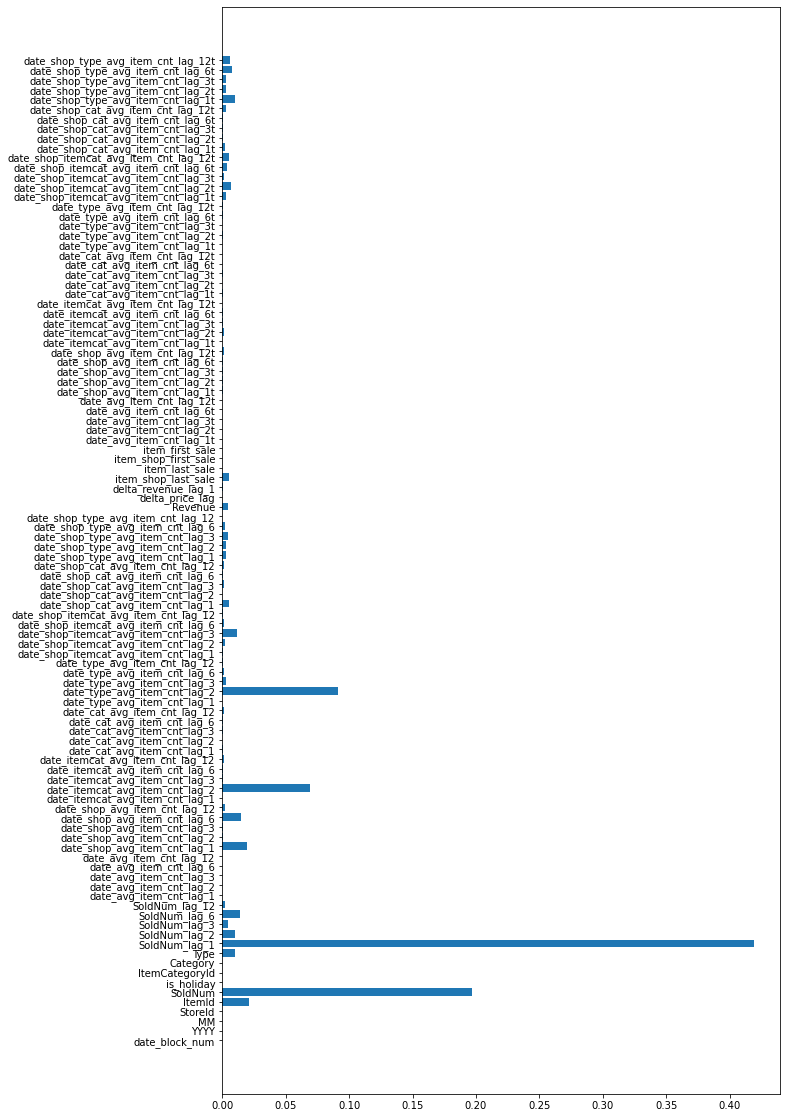

In [23]:
plt.subplots(figsize=(10,20))
plt.barh(data.columns,model.feature_importances_)

In [24]:
fti =model.feature_importances_
for i,feat in enumerate(data.columns):
    print('{0:10s} : {1:.6f}'.format(feat,fti[i]))

date_block_num : 0.000000
YYYY       : 0.000000
MM         : 0.000000
StoreId    : 0.000235
ItemId     : 0.020984
SoldNum    : 0.197231
is_holiday : 0.000186
ItemCategoryId : 0.000000
Category   : 0.000056
Type       : 0.009811
SoldNum_lag_1 : 0.418797
SoldNum_lag_2 : 0.009957
SoldNum_lag_3 : 0.004557
SoldNum_lag_6 : 0.013748
SoldNum_lag_12 : 0.001848
date_avg_item_cnt_lag_1 : 0.000000
date_avg_item_cnt_lag_2 : 0.000000
date_avg_item_cnt_lag_3 : 0.000000
date_avg_item_cnt_lag_6 : 0.000000
date_avg_item_cnt_lag_12 : 0.000000
date_shop_avg_item_cnt_lag_1 : 0.019813
date_shop_avg_item_cnt_lag_2 : 0.000686
date_shop_avg_item_cnt_lag_3 : 0.000365
date_shop_avg_item_cnt_lag_6 : 0.014794
date_shop_avg_item_cnt_lag_12 : 0.001931
date_itemcat_avg_item_cnt_lag_1 : 0.000000
date_itemcat_avg_item_cnt_lag_2 : 0.068823
date_itemcat_avg_item_cnt_lag_3 : 0.000512
date_itemcat_avg_item_cnt_lag_6 : 0.000870
date_itemcat_avg_item_cnt_lag_12 : 0.001693
date_cat_avg_item_cnt_lag_1 : 0.000663
date_cat_avg_i

# Feature importances

In [39]:
from sklearn.feature_selection import SelectFromModel

In [48]:
rfr = RandomForestRegressor(max_depth=5, min_samples_split=40, random_state=0)
selector = SelectFromModel(rfr,threshold='median')
feature_importance = selector.fit_transform(X_train,Y_train)
fti_model = rfr.fit(feature_importance,Y_train)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

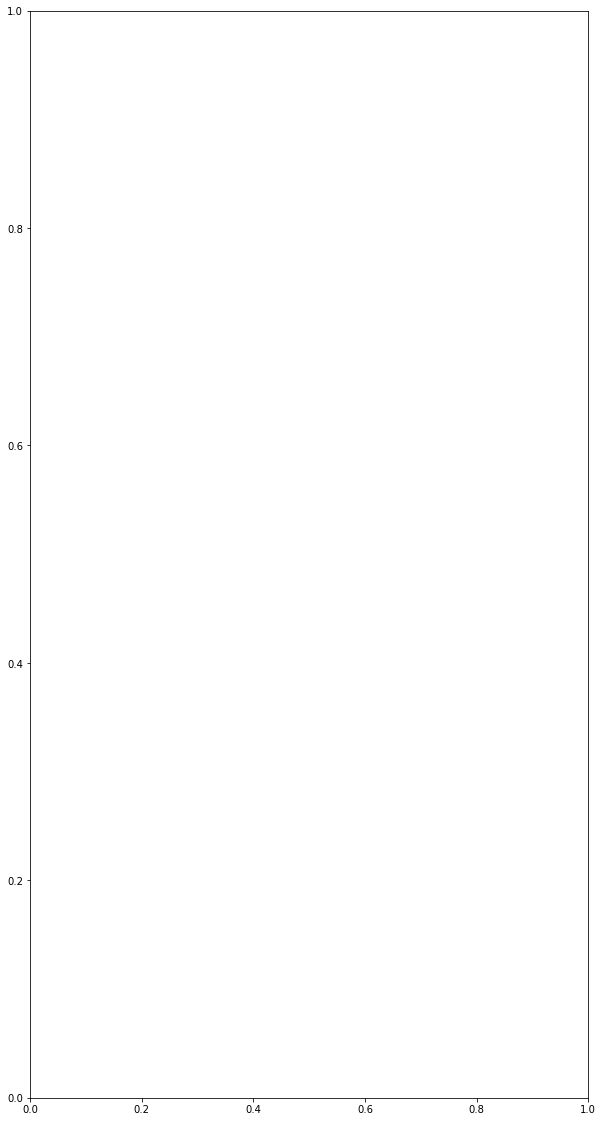

In [32]:
plt.subplots(figsize=(10,20))
plt.barh(data.columns,fti_model.feature_importances_)

In [30]:
Y_pred = model.predict(X_valid)
Y_test = model.predict(X_test)
# 学習モデルの評価
pred_train = model.predict(X_train)
print('train rmse:',mean_squared_error(Y_train,pred_train), 
      '\nvalid rmse:',mean_squared_error(Y_valid,Y_pred))

ValueError: Number of features of the model must match the input. Model n_features is 1 and input n_features is 102 

In [ ]:
Y_test.shape

In [ ]:
sub = pd.DataFrame(Y_test)
sub=sub.reset_index()
sub.drop('index',axis=1,inplace=True)
#sub.to_csv('./sub/sub_170_data_shifted_n102.csv',header=None)
sub

# 170item n62 shifted
## RF
- train rmse: 1.925068489527465 
- valid rmse: 1.112110371285896

## LGBM
- train rmse: 1.3245948315184255 
- valid rmse: 1.0831562001746171
# 170item n15 shifted
- train rmse: 1.9521866522059823 
- valid rmse: 1.0837525295531663

# 170item n102 shifted
# LGBM
- train rmse: 1.4367909206592175 
- valid rmse: 1.0366511792454673
# RF
- train rmse: 1.916471122883867 
- valid rmse: 1.1199549830122177

### 170item
- train rmse: 0.3514101314248571 
- valid rmse: 0.35570241819879894

### n60
#'YYYY',  #'MM',  #'StoreId', #'ItemId', ( #'StoreId', #'ItemId',と同スコア）

### XGboost
- train rmse: 0.29034735378634735 
- valid rmse: 0.34442551777180663
### LGBM
- train rmse: 0.21164506441564213 
- valid rmse: 0.22978429540944267

### 26 features
- train rmse: 0.36613899749754336 
- valid rmse: 0.34295317268310577
### n102 (with from total w/o outlier)
- train rmse: 0.29084835741109794 
- valid rmse: 0.2824319863692583

### all_item
- train rmse: 2.2297869317767787 
- valid rmse: 1.6987105703234906

### all_data outlier
- train rmse: 1.5102106962876753 
- valid rmse: 1.5436462588268263